<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* IsActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
    - 0 = No ( Customer did not leave the bank )
    - 1 = Yes ( Customer left the bank )

## Importing necessary libraries

In [43]:
# Installing the libraries with the specified version.
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 -q --user

**Note:** After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.

In [44]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# importing different functions to build models
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout

# importing SMOTE
from imblearn.over_sampling import SMOTE

# importing metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score

import random

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [45]:
# uncomment and run the following lines in case Colab is being used
# from google.colab import drive
# drive.mount('/content/drive')

In [46]:
ds = pd.read_csv("Churn.csv")    # complete the code to load the dataset

## Data Overview

### View the first and last 5 rows of the dataset.

In [47]:

ds.head() ##  top 5 rows of the data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [48]:

ds.tail() ##  last 5 rows of the data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### Understand the shape of the dataset

In [49]:
# Checking the number of rows and columns in the training data
ds.shape 

(10000, 14)

### Check the data types of the columns for the dataset

In [50]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


* 3 object variables
* no missing values

### Checking the Statistical Summary

In [51]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


### Checking for Missing Values

In [52]:
# check for missing values in the data
ds.isnull().sum() 

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

* no missing values

### Checking for unique values for each of the column

In [53]:
ds.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [54]:
#RowNumber , CustomerId and Surname are unique hence dropping it
ds = ds.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [55]:
ds.shape

(10000, 11)

## Exploratory Data Analysis

### Univariate Analysis

In [56]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [57]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on CreditScore

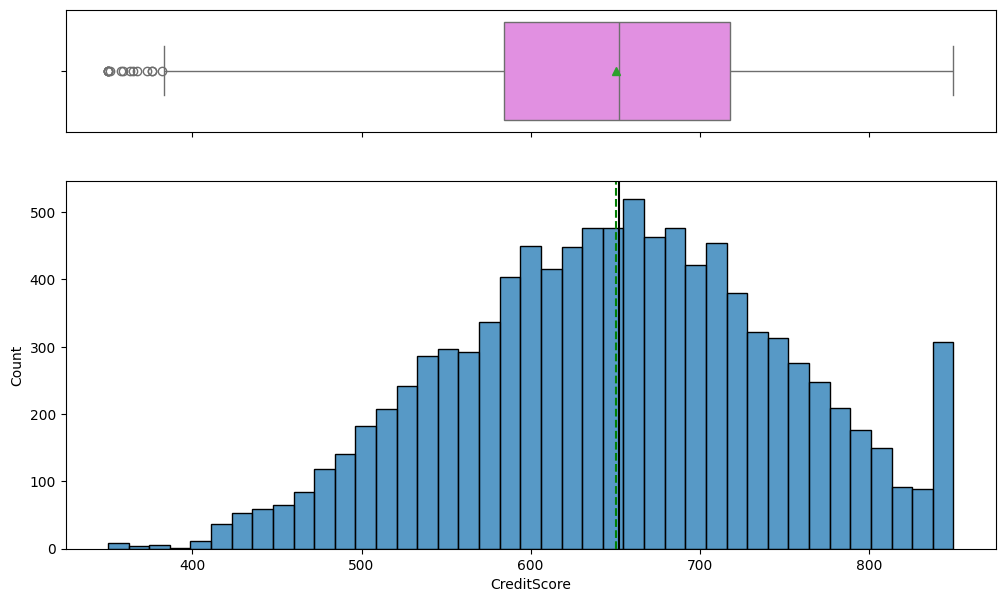

In [58]:
histogram_boxplot(ds,'CreditScore')

#### Observations on Age

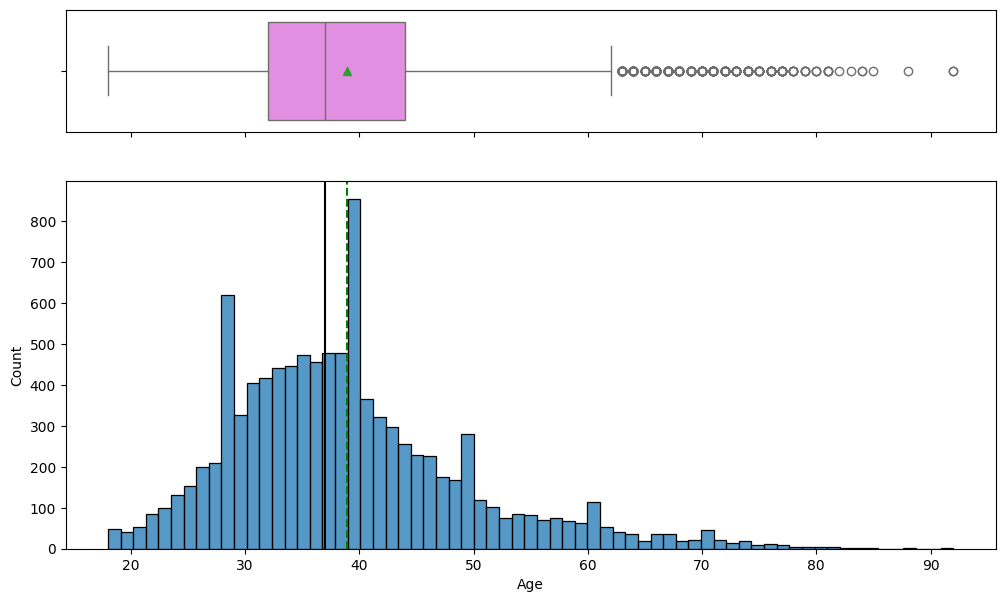

In [59]:
histogram_boxplot(ds, "Age")          


#### Observations on Balance

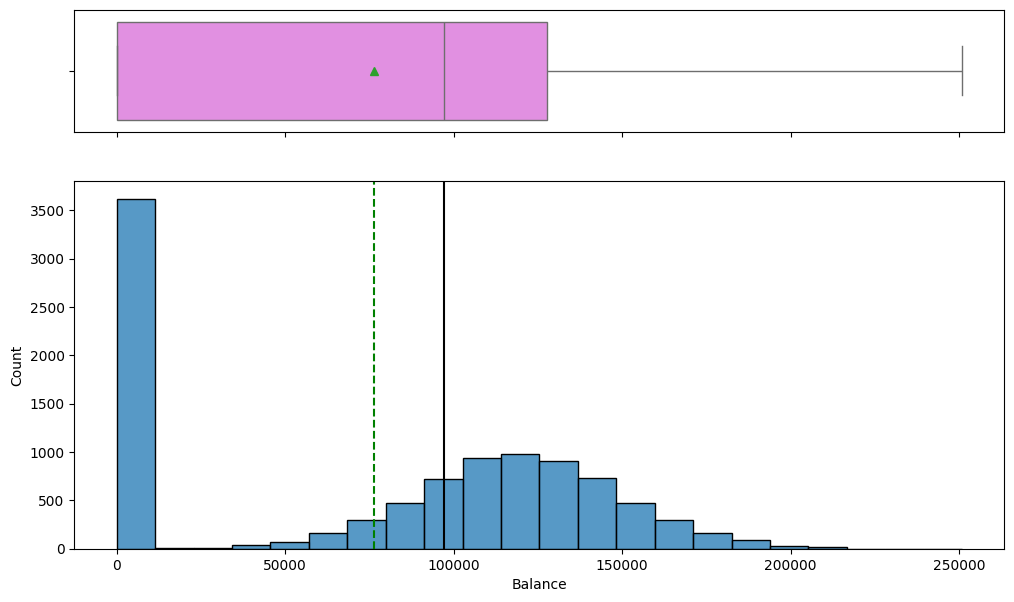

In [60]:
histogram_boxplot(ds, "Balance")          


#### Observations on Estimated Salary

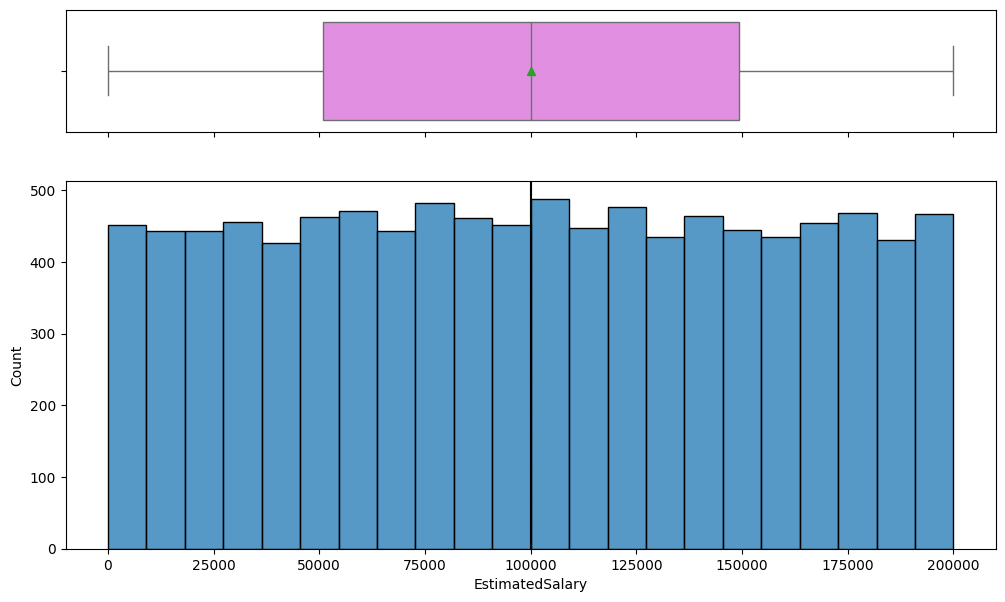

In [61]:
histogram_boxplot(ds, "EstimatedSalary")          


#### Observations on Exited

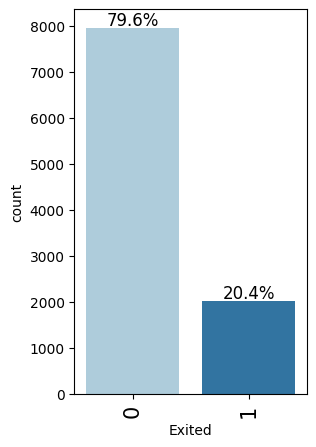

In [62]:
labeled_barplot(ds, "Exited", perc=True)

#### Observations on Geography

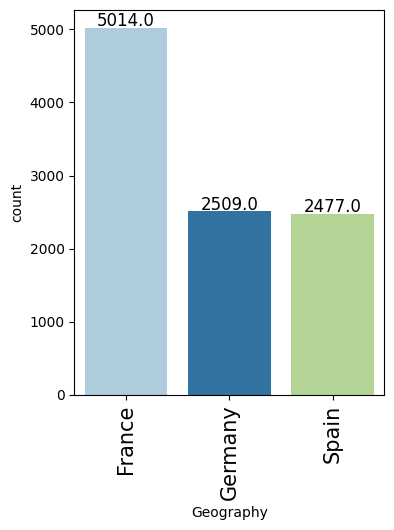

In [63]:
labeled_barplot(ds, "Geography")               


#### Observations on Gender

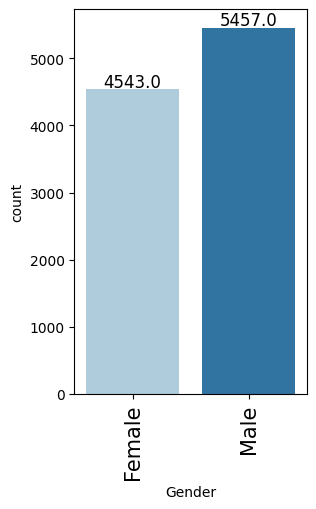

In [64]:
labeled_barplot(ds, "Gender")               


#### Observations on Tenure

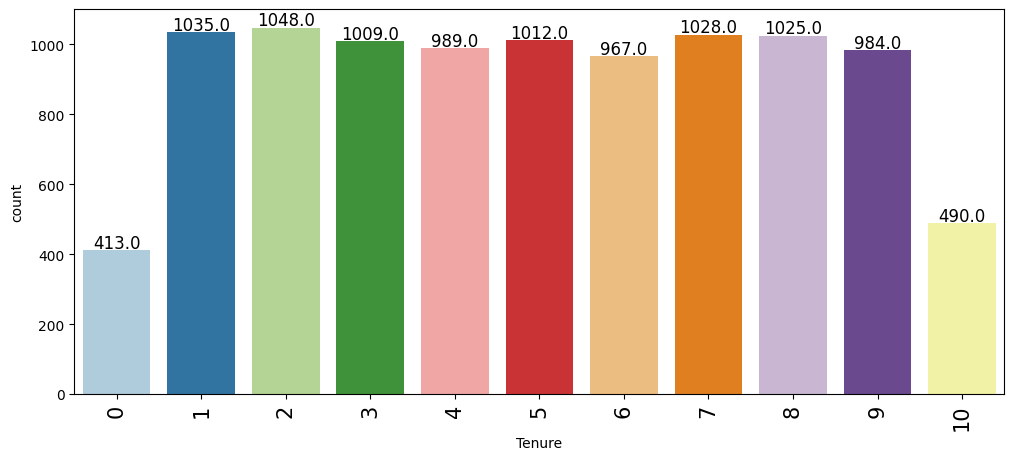

In [65]:
labeled_barplot(ds, "Tenure")               


#### Observations on Number of Products

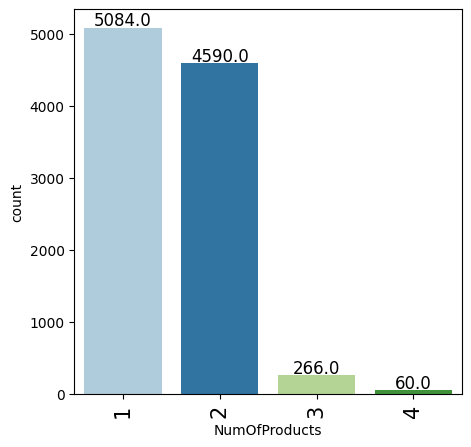

In [66]:
labeled_barplot(ds, "NumOfProducts")               


#### Observations on Has Credit Card

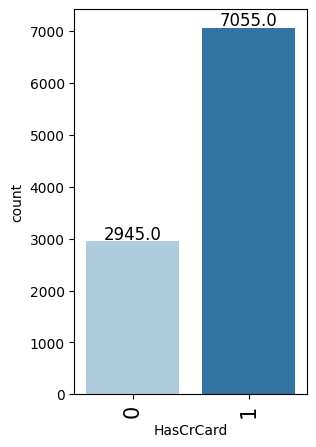

In [67]:
labeled_barplot(ds,"HasCrCard" )               


#### Observations on Is Active Member

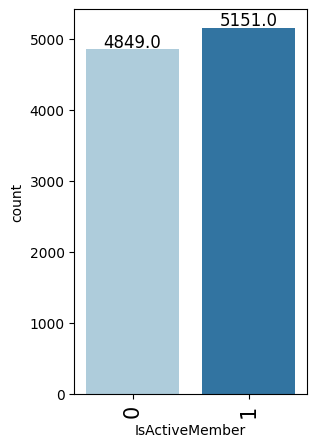

In [68]:
labeled_barplot(ds, "IsActiveMember")               


### Bivariate Analysis

In [69]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Correlation plot

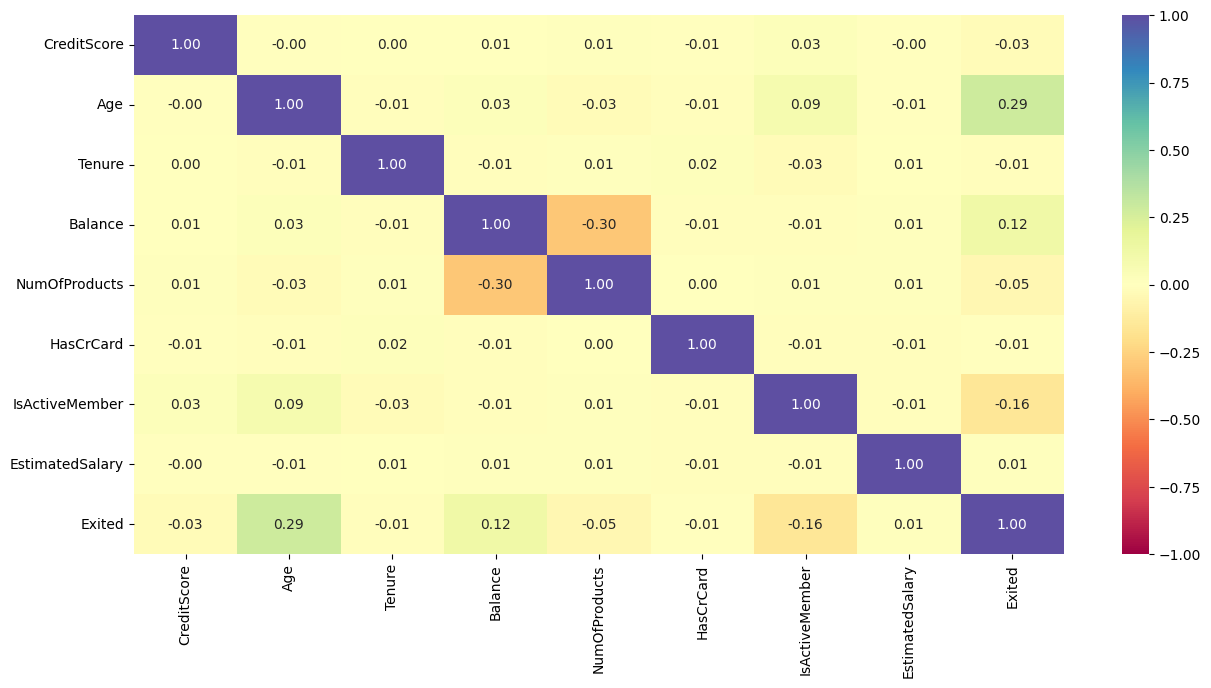

In [70]:
plt.figure(figsize=(15, 7))
sns.heatmap(ds.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")          
# get the heatmap of the data
plt.show()

#### Exited Vs Geography

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


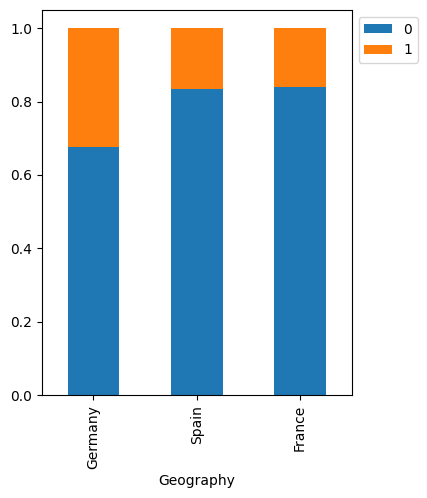

In [71]:
stacked_barplot(ds, "Geography", "Exited" )

#### Exited Vs Gender

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


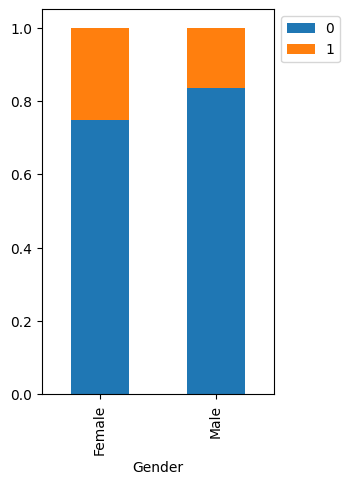

In [72]:
stacked_barplot(ds, "Gender", "Exited")                   


#### Exited Vs Has Credit Card

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


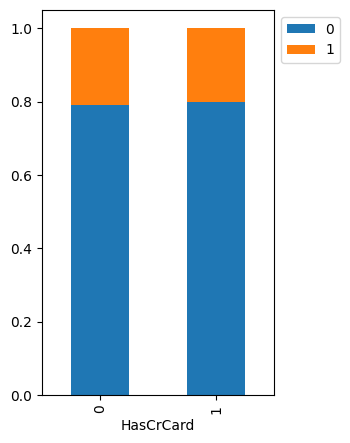

In [73]:
stacked_barplot(ds, "HasCrCard", "Exited")                   


#### Exited Vs Is active member

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


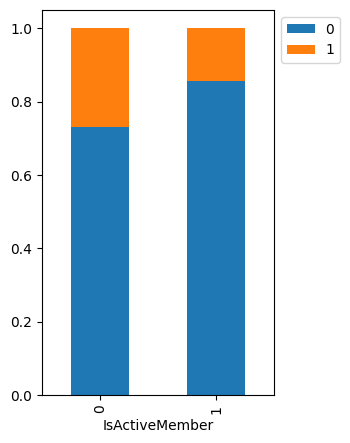

In [74]:
stacked_barplot(ds, "IsActiveMember", "Exited")                   


#### Exited Vs Credit Score

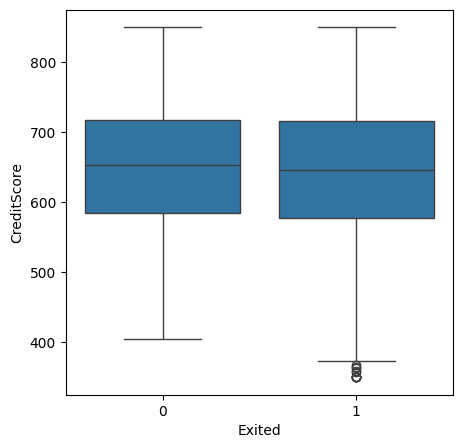

In [75]:
plt.figure(figsize=(5,5))
sns.boxplot(y='CreditScore',x='Exited',data=ds)
plt.show()

#### Exited Vs Age

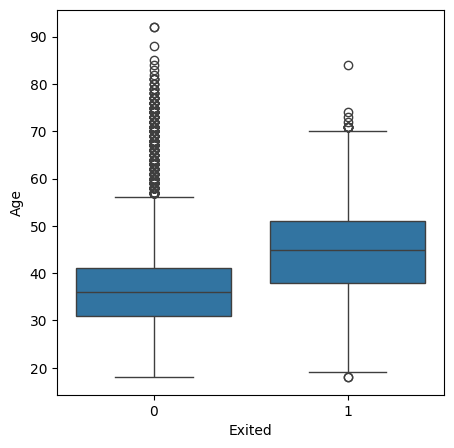

In [76]:
plt.figure(figsize=(5,5))
sns.boxplot(y="Age",x="Exited",data=ds)               

plt.show()

#### Exited Vs Tenure

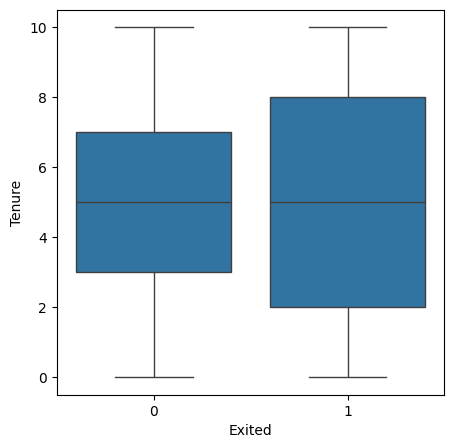

In [77]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Tenure',x='Exited',data=ds)               

plt.show()

#### Exited Vs Balance

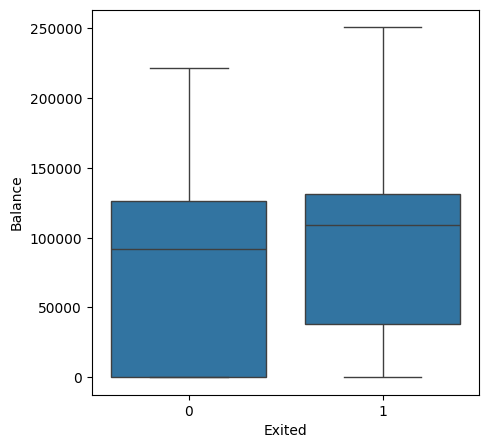

In [78]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Balance',x='Exited',data=ds)               
plt.show()

#### Exited Vs Number of Products

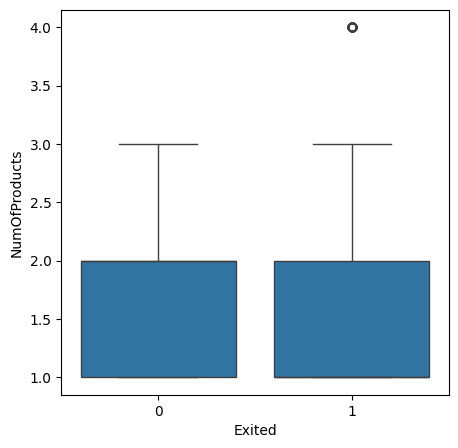

In [79]:
plt.figure(figsize=(5,5))
sns.boxplot(y='NumOfProducts',x='Exited',data=ds)               

plt.show()

#### Exited Vs Estimated Salary

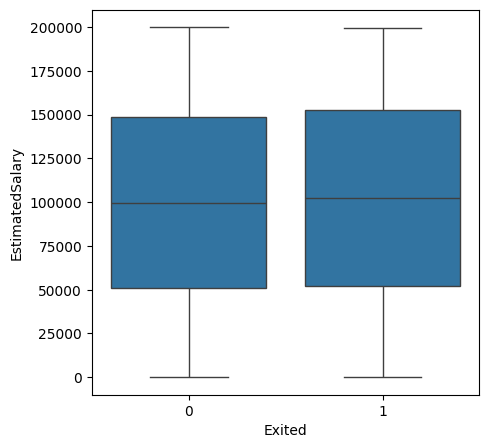

In [80]:
plt.figure(figsize=(5,5))
sns.boxplot(y='EstimatedSalary',x='Exited',data = ds)               

plt.show()

## Data Preprocessing

### Train-validation-test Split

In [81]:
X = ds.drop(['Exited'],axis=1) # Credit Score through Estimated Salary
y = ds['Exited'] # Exited

In [82]:
# Splitting the dataset into the Training and Testing set.
## Split the X and y and obtain test set
X_large, X_test, y_large, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,stratify=y,shuffle = True) 


In [83]:
# Splitting the dataset into the Training and Testing set.

X_train, X_val, y_train, y_val = train_test_split(X_large, y_large, test_size = 0.25, random_state = 42,stratify=y_large, shuffle = True) ## complete the code to Split X_large and y_large to obtain train and validation sets

In [84]:
print(X_train.shape, X_val.shape, X_test.shape)

(6000, 10) (2000, 10) (2000, 10)


In [85]:
print(y_train.shape, y_val.shape, y_test.shape)

(6000,) (2000,) (2000,)


### Dummy Variable Creation

In [86]:
# Encoding Geography variable
X_train = pd.get_dummies(X_train, columns=["Geography","Gender"],drop_first=True)
## encode Geography and Gender in test set
X_test = pd.get_dummies(X_test, columns=["Geography","Gender"],drop_first=True)   
## encode Geography and Gender in validation set
X_val = pd.get_dummies(X_val, columns=["Geography","Gender"],drop_first=True)     


### Data Normalization

Since all the numerical values are on a different scale, so we will be scaling all the numerical values to bring them to the same scale.

In [87]:
# defining the list of columns to normalize
cols_list = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]

# creating an instance of the standard scaler
sc = StandardScaler()

X_train[cols_list] = sc.fit_transform(X_train[cols_list])
## specify the columns to normalize
X_val[cols_list] = sc.transform(X_val[cols_list])    
## specify the columns to normalize for test set
X_test[cols_list] = sc.transform(X_test[cols_list])    


## Model Building

### Model Evaluation Criterion

Write down the logic for choosing the metric that would be the best metric for this business scenario.

- Predicting that customer will not attrite but he attrites i.e. losing on a valuable customer or asset.

**How to reduce this loss i.e need to reduce False Negatives??**

- Bank would want Recall to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives or in other words identifying the true positives(i.e. Class 1) so that the bank can retain their valuable customers by identifying the customers who are at risk of attrition.


**Let's create a function for plotting the confusion matrix**



In [88]:
def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

Let's create two blank dataframes that will store the recall values for all the models we build.

In [89]:
train_metric_df = pd.DataFrame(columns=["recall"])
valid_metric_df = pd.DataFrame(columns=["recall"])

### Neural Network with SGD Optimizer

In [90]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [91]:
#Initializing the neural network
model_0 = Sequential()
# Adding the input layer with 64 neurons and relu as activation function
model_0.add(Dense(64, activation='relu', input_dim = X_train.shape[1]))
# add a hidden layer (specify the # of neurons and the activation function)
model_0.add(Dense(32, activation='relu'))
# add the output layer with the number of neurons required.
model_0.add(Dense(1, activation = 'linear'))

In [92]:
#use SGD as the optimizer.
optimizer = tf.keras.optimizers.SGD(0.001)

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [93]:
## compile the model with binary cross entropy as 
## loss function and recall as the metric.
model_0.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [94]:
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [95]:
history_0 = model_0.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50)

Epoch 1/50
188/188 [==============================] - 0s 893us/step - loss: 7.3523 - recall: 0.6419 - val_loss: 12.1460 - val_recall: 1.0000
Epoch 2/50
188/188 [==============================] - 0s 576us/step - loss: 12.1409 - recall: 1.0000 - val_loss: 12.1460 - val_recall: 1.0000
Epoch 3/50
188/188 [==============================] - 0s 537us/step - loss: 12.1409 - recall: 1.0000 - val_loss: 12.1460 - val_recall: 1.0000
Epoch 4/50
188/188 [==============================] - 0s 541us/step - loss: 12.1409 - recall: 1.0000 - val_loss: 12.1460 - val_recall: 1.0000
Epoch 5/50
188/188 [==============================] - 0s 530us/step - loss: 12.1409 - recall: 1.0000 - val_loss: 12.1460 - val_recall: 1.0000
Epoch 6/50
188/188 [==============================] - 0s 530us/step - loss: 12.1409 - recall: 1.0000 - val_loss: 12.1460 - val_recall: 1.0000
Epoch 7/50
188/188 [==============================] - 0s 571us/step - loss: 12.1409 - recall: 1.0000 - val_loss: 12.1460 - val_recall: 1.0000
Epoch 8

In [96]:
# Fitting the ANN

history_0 = model_0.fit(X_train, y_train,
    batch_size=50,    ## specify the batch size to use
    validation_data=(X_val,y_val),
    #validation_split=0.2,
    epochs=50, ##,    ## specify the number of epochs
    verbose=1
)

Epoch 1/50
120/120 [==============================] - 0s 880us/step - loss: 12.1409 - recall: 1.0000 - val_loss: 12.1460 - val_recall: 1.0000
Epoch 2/50
120/120 [==============================] - 0s 639us/step - loss: 12.1409 - recall: 1.0000 - val_loss: 12.1460 - val_recall: 1.0000
Epoch 3/50
120/120 [==============================] - 0s 618us/step - loss: 12.1409 - recall: 1.0000 - val_loss: 12.1460 - val_recall: 1.0000
Epoch 4/50
120/120 [==============================] - 0s 592us/step - loss: 12.1409 - recall: 1.0000 - val_loss: 12.1460 - val_recall: 1.0000
Epoch 5/50
120/120 [==============================] - 0s 573us/step - loss: 12.1409 - recall: 1.0000 - val_loss: 12.1460 - val_recall: 1.0000
Epoch 6/50
120/120 [==============================] - 0s 581us/step - loss: 12.1409 - recall: 1.0000 - val_loss: 12.1460 - val_recall: 1.0000
Epoch 7/50
120/120 [==============================] - 0s 582us/step - loss: 12.1409 - recall: 1.0000 - val_loss: 12.1460 - val_recall: 1.0000
Epoch 

**Loss function**

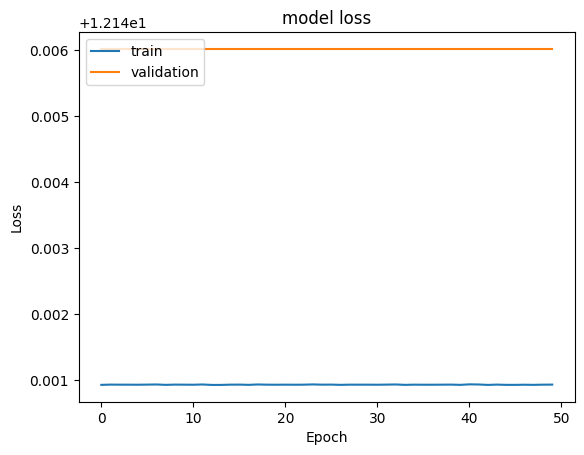

In [97]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_0.history['loss'])
plt.plot(history_0.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Recall**

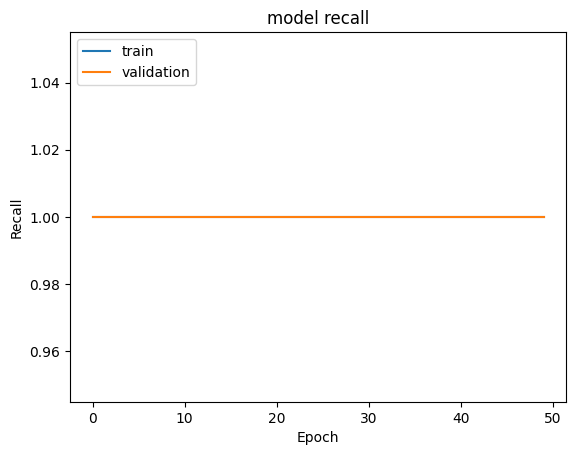

In [98]:
#Plotting Train recall vs Validation recall
plt.plot(history_0.history['recall'])
plt.plot(history_0.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [99]:
#Predicting the results using best as a threshold
y_train_pred = model_0.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

188/188 [==============================] - 0s 448us/step


array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [100]:
#Predicting the results using best as a threshold
y_val_pred = model_0.predict(X_val)    ## make prediction on the validation set
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 [==============================] - 0s 421us/step


array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [101]:
model_name = "NN with SGD"

train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)

**Classification report**

In [102]:
#lassification report
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4777
           1       0.20      1.00      0.34      1223

    accuracy                           0.20      6000
   macro avg       0.10      0.50      0.17      6000
weighted avg       0.04      0.20      0.07      6000



In [103]:
#classification report
cr=classification_report(y_val, y_val_pred)    
## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1593
           1       0.20      1.00      0.34       407

    accuracy                           0.20      2000
   macro avg       0.10      0.50      0.17      2000
weighted avg       0.04      0.20      0.07      2000



**Confusion matrix**

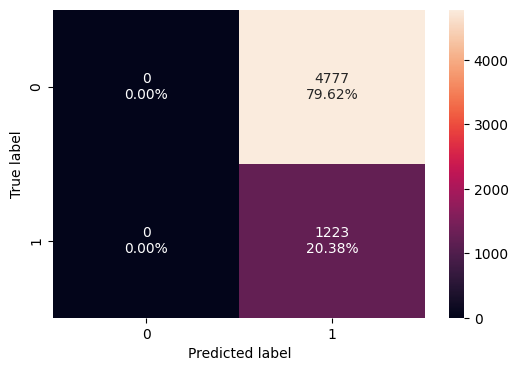

In [104]:
make_confusion_matrix(y_train, y_train_pred)

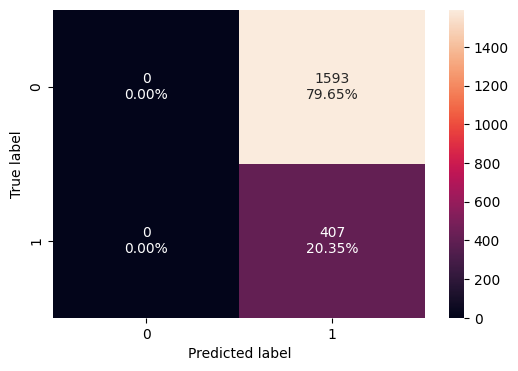

In [105]:
make_confusion_matrix(y_val, y_val_pred)    
## check the model's performance on the validation set

## Model Performance Improvement

### Neural Network with Adam Optimizer

In [106]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [107]:
#Initializing the neural network
model_1 = Sequential()
#add a input layer (specify the # of neurons and activation function)
model_1.add(Dense(64,activation='relu',input_dim = X_train.shape[1]))
#add a hidden layer (specify the # of neurons and activation function)
model_1.add(Dense(16,activation='relu'))
#add a output layer with the required number of neurons and relu as activation function
model_1.add(Dense(1, activation = 'linear'))

In [108]:
#use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [109]:
# compile the model with binary cross entropy as loss function and recall as the metric
model_1.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [110]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 16)                1040      
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1825 (7.13 KB)
Trainable params: 1825 (7.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [111]:
#Fitting the ANN
history_1 = model_1.fit(
    X_train,y_train,
    batch_size=50, ## specify the batch size to use
    validation_data=(X_val,y_val),
    epochs=50, ## specify the number of epochs
    verbose=1
)

Epoch 1/50
120/120 [==============================] - 1s 2ms/step - loss: 1.0847 - recall: 0.2289 - val_loss: 0.5736 - val_recall: 0.2948
Epoch 2/50
120/120 [==============================] - 0s 955us/step - loss: 0.5556 - recall: 0.1848 - val_loss: 0.4999 - val_recall: 0.1400
Epoch 3/50
120/120 [==============================] - 0s 1ms/step - loss: 0.4800 - recall: 0.1652 - val_loss: 0.4853 - val_recall: 0.2138
Epoch 4/50
120/120 [==============================] - 0s 2ms/step - loss: 0.4879 - recall: 0.1930 - val_loss: 0.4826 - val_recall: 0.2162
Epoch 5/50
120/120 [==============================] - 0s 1ms/step - loss: 0.4556 - recall: 0.2420 - val_loss: 0.4695 - val_recall: 0.1966
Epoch 6/50
120/120 [==============================] - 0s 1ms/step - loss: 0.5044 - recall: 0.2878 - val_loss: 0.5176 - val_recall: 0.2187
Epoch 7/50
120/120 [==============================] - 0s 2ms/step - loss: 0.4827 - recall: 0.2494 - val_loss: 0.4811 - val_recall: 0.2138
Epoch 8/50
120/120 [============

**Loss function**

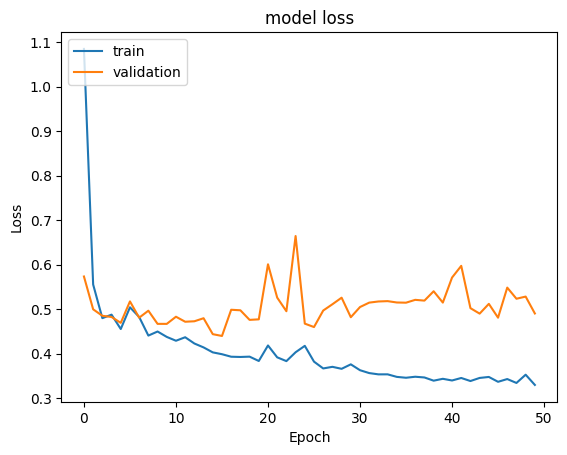

In [112]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Recall**

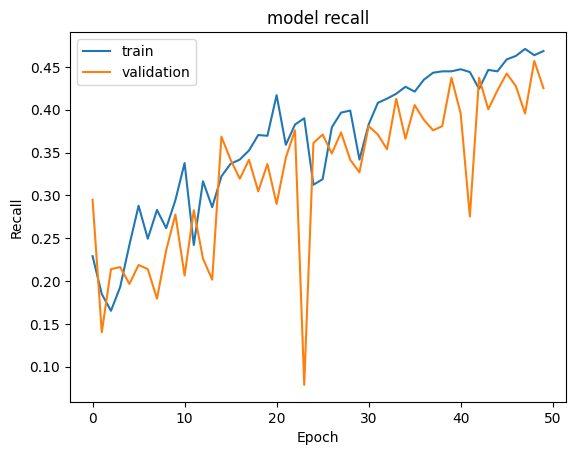

In [113]:
#Plotting Train recall vs Validation recall
plt.plot(history_1.history['recall'])
plt.plot(history_1.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [114]:
#Predicting the results using 0.5 as the threshold
y_train_pred = model_1.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

188/188 [==============================] - 0s 578us/step


array([[False],
       [False],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [115]:
#Predicting the results using 0.5 as the threshold
y_val_pred = model_1.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 [==============================] - 0s 546us/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [116]:
model_name = "NN with Adam"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [117]:
#lassification report
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      4777
           1       0.77      0.48      0.59      1223

    accuracy                           0.86      6000
   macro avg       0.83      0.72      0.75      6000
weighted avg       0.86      0.86      0.85      6000



In [118]:
#classification report
cr=classification_report(y_val,y_val_pred)  
## check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1593
           1       0.74      0.43      0.54       407

    accuracy                           0.85      2000
   macro avg       0.81      0.69      0.73      2000
weighted avg       0.84      0.85      0.84      2000



**Confusion matrix**

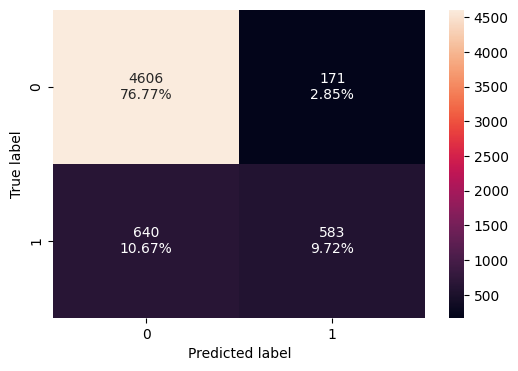

In [119]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

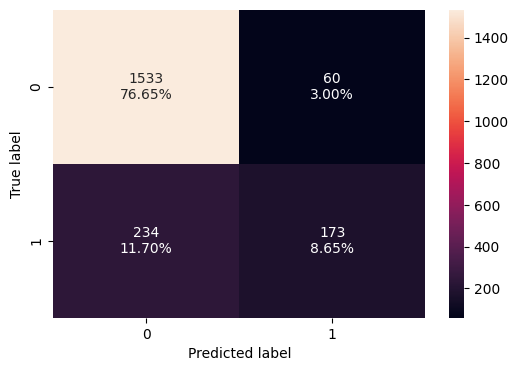

In [120]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)  
## check the model's performance on the validation set

### Neural Network with Adam Optimizer and Dropout

In [121]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [122]:
#Initializing the neural network
model_2 = Sequential()
#Adding the input layer with 32 neurons and relu as activation function
model_2.add(Dense(32,activation='relu',input_dim = X_train.shape[1]))
# add dropout with ratio of 0.2 or any suitable value.
model_2.add(Dropout(0.2))
# add a hidden layer (specify the # of neurons and the activation function)
model_2.add(Dense(32,activation='relu'))
# add a hidden layer (specify the # of neurons and the activation function)
model_2.add(Dense(16,activation='relu'))
# add dropout with ratio of 0.1 or any suitable value.
model_2.add(Dropout(0.1))
# add a hidden layer (specify the # of neurons and the activation function)
model_2.add(Dense(8,activation='relu'))
# add the number of neurons required in the output layer.
model_2.add(Dense(1, activation = 'sigmoid'))

In [123]:
# use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [124]:
## compile the model with binary cross entropy as loss function and recall as the metric.
model_2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [125]:
# Summary of the model
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 1)                 9

In [126]:
#Fitting the ANN with batch_size = 32 and 100 epochs
history_2 = model_2.fit(
    X_train,y_train,
    batch_size=50,  ##specify the batch size.
    epochs=50, ##specify the # of epochs.
    verbose=1,
    validation_data=(X_val,y_val)
)

Epoch 1/50
120/120 [==============================] - 1s 3ms/step - loss: 0.5079 - recall: 0.0352 - val_loss: 0.4589 - val_recall: 0.0000e+00
Epoch 2/50
120/120 [==============================] - 0s 1ms/step - loss: 0.4539 - recall: 0.0196 - val_loss: 0.4398 - val_recall: 0.0025
Epoch 3/50
120/120 [==============================] - 0s 2ms/step - loss: 0.4424 - recall: 0.0646 - val_loss: 0.4331 - val_recall: 0.0565
Epoch 4/50
120/120 [==============================] - 0s 2ms/step - loss: 0.4363 - recall: 0.1169 - val_loss: 0.4301 - val_recall: 0.1106
Epoch 5/50
120/120 [==============================] - 0s 2ms/step - loss: 0.4312 - recall: 0.1979 - val_loss: 0.4252 - val_recall: 0.1867
Epoch 6/50
120/120 [==============================] - 0s 2ms/step - loss: 0.4250 - recall: 0.2224 - val_loss: 0.4184 - val_recall: 0.2678
Epoch 7/50
120/120 [==============================] - 0s 1ms/step - loss: 0.4157 - recall: 0.2788 - val_loss: 0.4130 - val_recall: 0.2310
Epoch 8/50
120/120 [==========

**Loss function**

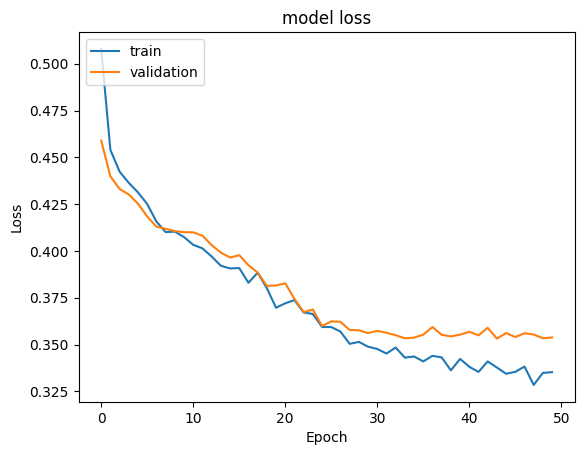

In [127]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we can observe that the train and validation curves are having smooth lines. Reducing the number of neurons and adding dropouts to the model worked, and the problem of overfitting was solved.

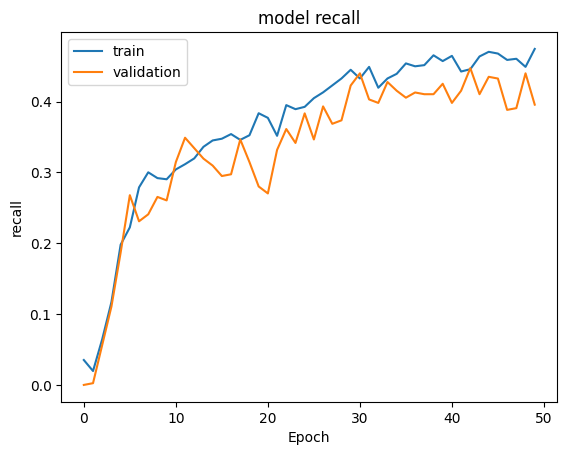

In [128]:
#Plotting Train recall vs Validation recall
plt.plot(history_2.history['recall'])
plt.plot(history_2.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [129]:
#Predicting the results using best as a threshold
y_train_pred = model_2.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

188/188 [==============================] - 0s 560us/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

In [130]:
#Predicting the results using 0.5 as the threshold.
y_val_pred = model_2.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 [==============================] - 0s 545us/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [131]:
model_name = "NN with Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [132]:
#classification report
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.98      0.92      4777
           1       0.84      0.46      0.60      1223

    accuracy                           0.87      6000
   macro avg       0.86      0.72      0.76      6000
weighted avg       0.87      0.87      0.86      6000



In [133]:
#classification report
cr = classification_report(y_val,y_val_pred) ## check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1593
           1       0.76      0.40      0.52       407

    accuracy                           0.85      2000
   macro avg       0.81      0.68      0.72      2000
weighted avg       0.84      0.85      0.83      2000



**Confusion matrix**

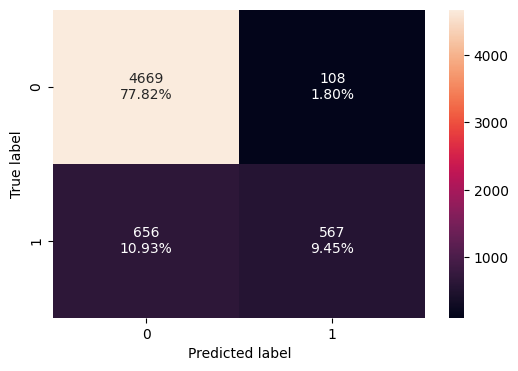

In [134]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

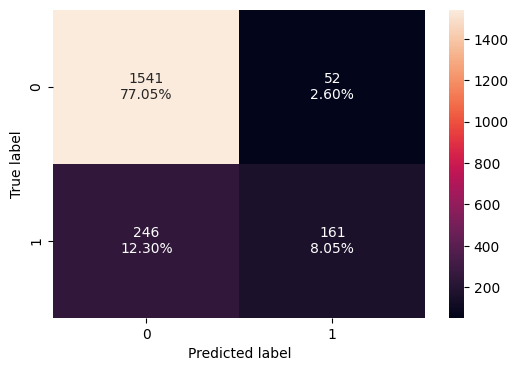

In [135]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)  ## check the model's performance on the validation set

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

**Let's try to apply SMOTE to balance this dataset and then again apply hyperparamter tuning accordingly.**

In [136]:
sm  = SMOTE(random_state=42)
#fit SMOTE on the training data.
X_train_smote, y_train_smote= sm.fit_resample(X_train,y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

After UpSampling, the shape of train_X: (9554, 11)
After UpSampling, the shape of train_y: (9554,) 



Let's build a model with the balanced dataset

In [137]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [138]:
#Initializing the model
model_3 = Sequential()
#add a input layer (specify the # of neurons and activation function)
model_3.add(Dense(64,activation='relu',input_dim = X_train_smote.shape[1]))
#add a hidden layer (specify the # of neurons and activation function)
model_3.add(Dense(32,activation='relu'))
#add a hidden layer (specify the # of neurons and activation function)
model_3.add(Dense(4,activation='relu'))
#add the required number of neurons in the output layer with a sigmoid activation function.
model_3.add(Dense(1, activation = 'sigmoid'))

In [139]:
#use SGD as the optimizer.
optimizer = tf.keras.optimizers.SGD(0.001)

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [140]:
# compile the model with binary cross entropy as loss function and recall as the metric
model_3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [141]:
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 4)                 132       
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 2985 (11.66 KB)
Trainable params: 2985 (11.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [142]:
#Fitting the ANN
history_3 = model_3.fit(
    X_train_smote, y_train_smote,
    batch_size=100, ## specify the batch size to use
    epochs=100, ## specify the number of epochs
    verbose=1,
    validation_data = (X_val,y_val)
)

Epoch 1/100
96/96 [==============================] - 0s 2ms/step - loss: 0.6959 - recall: 0.9866 - val_loss: 0.7506 - val_recall: 0.9779
Epoch 2/100
96/96 [==============================] - 0s 1ms/step - loss: 0.6944 - recall: 0.9799 - val_loss: 0.7457 - val_recall: 0.9656
Epoch 3/100
96/96 [==============================] - 0s 2ms/step - loss: 0.6932 - recall: 0.9711 - val_loss: 0.7414 - val_recall: 0.9484
Epoch 4/100
96/96 [==============================] - 0s 1ms/step - loss: 0.6920 - recall: 0.9604 - val_loss: 0.7376 - val_recall: 0.9386
Epoch 5/100
96/96 [==============================] - 0s 853us/step - loss: 0.6910 - recall: 0.9546 - val_loss: 0.7342 - val_recall: 0.9312
Epoch 6/100
96/96 [==============================] - 0s 892us/step - loss: 0.6901 - recall: 0.9479 - val_loss: 0.7312 - val_recall: 0.9189
Epoch 7/100
96/96 [==============================] - 0s 737us/step - loss: 0.6893 - recall: 0.9355 - val_loss: 0.7285 - val_recall: 0.9115
Epoch 8/100
96/96 [================

Epoch 60/100
96/96 [==============================] - 0s 1ms/step - loss: 0.6562 - recall: 0.7521 - val_loss: 0.6964 - val_recall: 0.6609
Epoch 61/100
96/96 [==============================] - 0s 1ms/step - loss: 0.6554 - recall: 0.7519 - val_loss: 0.6962 - val_recall: 0.6609
Epoch 62/100
96/96 [==============================] - 0s 1ms/step - loss: 0.6545 - recall: 0.7547 - val_loss: 0.6960 - val_recall: 0.6609
Epoch 63/100
96/96 [==============================] - 0s 1ms/step - loss: 0.6537 - recall: 0.7551 - val_loss: 0.6958 - val_recall: 0.6609
Epoch 64/100
96/96 [==============================] - 0s 920us/step - loss: 0.6528 - recall: 0.7565 - val_loss: 0.6955 - val_recall: 0.6609
Epoch 65/100
96/96 [==============================] - 0s 991us/step - loss: 0.6520 - recall: 0.7565 - val_loss: 0.6952 - val_recall: 0.6683
Epoch 66/100
96/96 [==============================] - 0s 994us/step - loss: 0.6511 - recall: 0.7574 - val_loss: 0.6950 - val_recall: 0.6683
Epoch 67/100
96/96 [========

**Loss function**

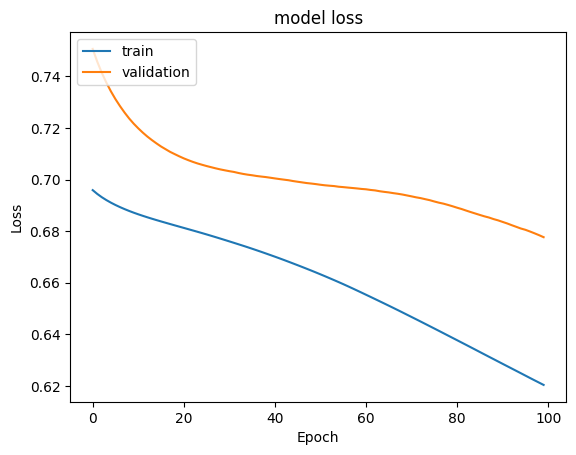

In [143]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

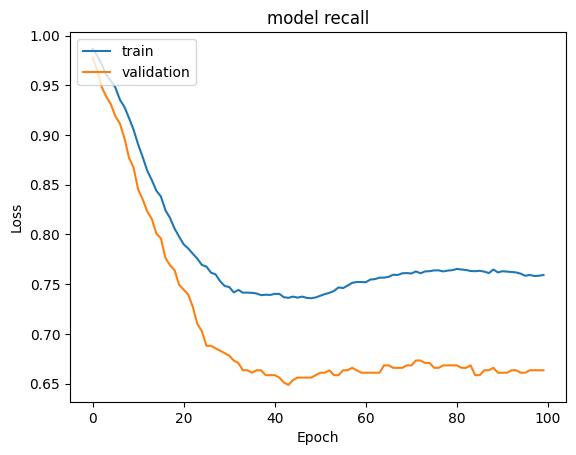

In [144]:
#Plotting Train recall vs Validation recall
plt.plot(history_3.history['recall'])
plt.plot(history_3.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [145]:
y_train_pred = model_3.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

299/299 [==============================] - 0s 1ms/step


array([[ True],
       [ True],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

In [146]:
y_val_pred = model_3.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [147]:
model_name = "NN with SMOTE & SGD"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [148]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.74      0.68      0.71      4777
           1       0.70      0.76      0.73      4777

    accuracy                           0.72      9554
   macro avg       0.72      0.72      0.72      9554
weighted avg       0.72      0.72      0.72      9554



In [149]:
cr=classification_report(y_val,y_val_pred) ## check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.68      0.77      1593
           1       0.35      0.66      0.46       407

    accuracy                           0.68      2000
   macro avg       0.62      0.67      0.61      2000
weighted avg       0.78      0.68      0.71      2000



**Confusion matrix**

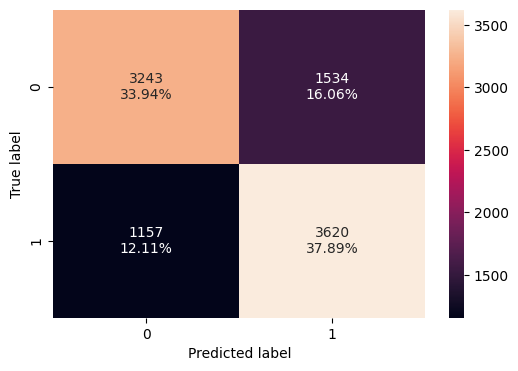

In [150]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

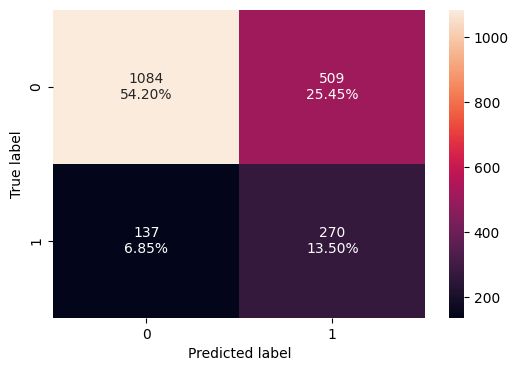

In [151]:
#Calculating the confusion matrix
## check the model's performance on the validation set
make_confusion_matrix(y_val,y_val_pred) 


### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

Let's build a model with the balanced dataset

In [152]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [153]:
#Initializing the model
model_4 = Sequential()
#add a input layer (specify the # of neurons and activation function)
model_4.add(Dense(64,activation='relu',input_dim = X_train_smote.shape[1]))
#add a hidden layer (specify the # of neurons and activation function)
model_4.add(Dense(32,activation='relu'))
#add a hidden layer (specify the # of neurons and activation function)
model_4.add(Dense(8,activation='relu'))
#add the required number of neurons in the output layer and a suitable activation function.
model_4.add(Dense(1, activation = 'sigmoid'))

In [154]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 8)                 264       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 3121 (12.19 KB)
Trainable params: 3121 (12.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [155]:
#use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [156]:
# compile the model with binary cross entropy as loss function and recall as the metric
model_4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [157]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 8)                 264       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 3121 (12.19 KB)
Trainable params: 3121 (12.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [158]:
#Fitting the ANN

history_4 = model_4.fit(
    X_train_smote,y_train_smote,
    batch_size=50, ## specify the batch size to use
    epochs=50,  ## specify the number of epochs
    verbose=1,
    validation_data = (X_val,y_val)
)

Epoch 1/50
192/192 [==============================] - 1s 2ms/step - loss: 0.5684 - recall: 0.7251 - val_loss: 0.6049 - val_recall: 0.7101
Epoch 2/50
192/192 [==============================] - 0s 1ms/step - loss: 0.5004 - recall: 0.7519 - val_loss: 0.5594 - val_recall: 0.6683
Epoch 3/50
192/192 [==============================] - 0s 1ms/step - loss: 0.4726 - recall: 0.7597 - val_loss: 0.5068 - val_recall: 0.6585
Epoch 4/50
192/192 [==============================] - 0s 1ms/step - loss: 0.4509 - recall: 0.7844 - val_loss: 0.4669 - val_recall: 0.6167
Epoch 5/50
192/192 [==============================] - 0s 731us/step - loss: 0.4353 - recall: 0.7949 - val_loss: 0.4803 - val_recall: 0.6486
Epoch 6/50
192/192 [==============================] - 0s 768us/step - loss: 0.4247 - recall: 0.8001 - val_loss: 0.4745 - val_recall: 0.6585
Epoch 7/50
192/192 [==============================] - 0s 705us/step - loss: 0.4145 - recall: 0.8114 - val_loss: 0.4665 - val_recall: 0.6880
Epoch 8/50
192/192 [========

**Loss function**

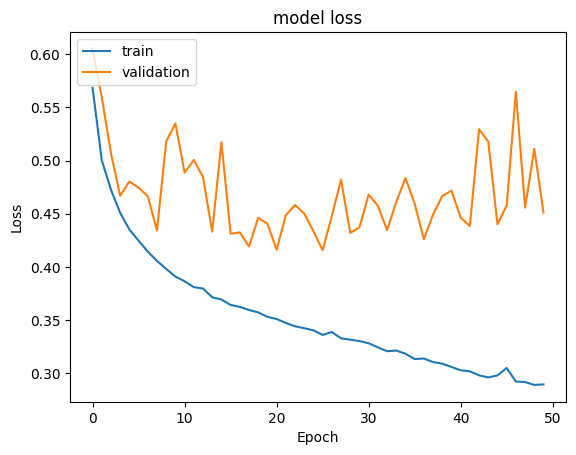

In [159]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

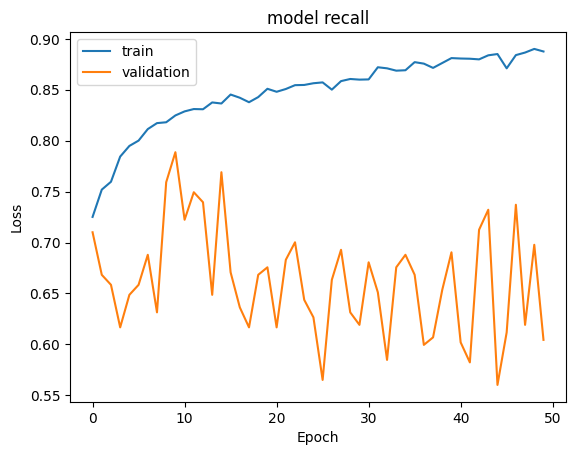

In [160]:
#Plotting Train recall vs Validation recall
plt.plot(history_4.history['recall'])
plt.plot(history_4.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [161]:
y_train_pred = model_4.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

299/299 [==============================] - 0s 559us/step


array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [162]:
y_val_pred = model_4.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 [==============================] - 0s 578us/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [163]:
model_name = "NN with SMOTE & Adam"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [164]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.91      0.89      4777
           1       0.90      0.85      0.88      4777

    accuracy                           0.88      9554
   macro avg       0.88      0.88      0.88      9554
weighted avg       0.88      0.88      0.88      9554



In [165]:
cr=classification_report(y_val,y_val_pred) ## check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1593
           1       0.56      0.60      0.58       407

    accuracy                           0.82      2000
   macro avg       0.73      0.74      0.74      2000
weighted avg       0.83      0.82      0.83      2000



**Confusion matrix**

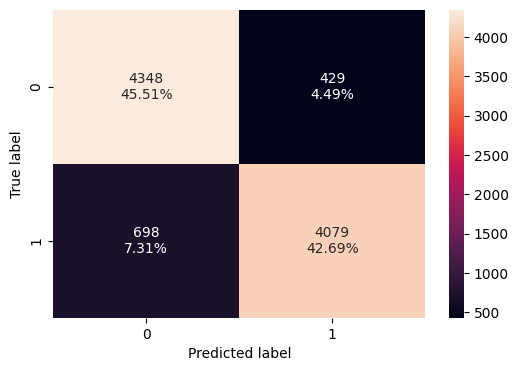

In [166]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

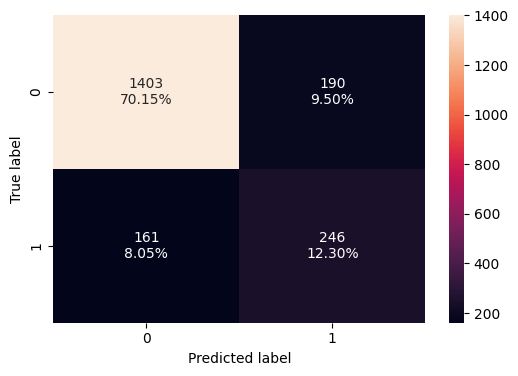

In [167]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)  ## check the model's performance on the validation set

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [168]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [169]:
#Initializing the model
model_5 = Sequential()
# add required # of neurons to the input layer with relu as activation function
model_5.add(Dense(64,activation='relu',input_dim = X_train_smote.shape[1]))
#add dropout rate
model_5.add(Dropout(0.2))
# add required # neurons to the hidden layer with any activation function.
model_5.add(Dense(32,activation='relu'))
# add dropout rate.
model_5.add(Dropout(0.1))
# Adding hidden layer with 8 neurons with relu as activation function
model_5.add(Dense(8,activation='relu'))
# add the required number of neurons in the output layer with a suitable activation function.
model_5.add(Dense(1, activation = 'sigmoid'))

In [170]:
#use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [171]:
# compile the model with binary cross entropy as loss function and recall as the metric
model_5.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [172]:
model_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 264       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 3121 (12.19 KB)
Trainable params: 3121 (12

In [173]:
history_5 = model_5.fit(
    X_train_smote,y_train_smote,
    batch_size=50, ## specify the batch size to use
    epochs=50, ## specify the number of epochs
    verbose=1,
    validation_data = (X_val,y_val))

Epoch 1/50
192/192 [==============================] - 1s 2ms/step - loss: 0.5921 - recall: 0.6875 - val_loss: 0.5820 - val_recall: 0.6806
Epoch 2/50
192/192 [==============================] - 0s 935us/step - loss: 0.5299 - recall: 0.7356 - val_loss: 0.5504 - val_recall: 0.6388
Epoch 3/50
192/192 [==============================] - 0s 1ms/step - loss: 0.5135 - recall: 0.7283 - val_loss: 0.5270 - val_recall: 0.6265
Epoch 4/50
192/192 [==============================] - 0s 967us/step - loss: 0.5034 - recall: 0.7513 - val_loss: 0.5133 - val_recall: 0.6143
Epoch 5/50
192/192 [==============================] - 0s 820us/step - loss: 0.4851 - recall: 0.7526 - val_loss: 0.5011 - val_recall: 0.6143
Epoch 6/50
192/192 [==============================] - 0s 718us/step - loss: 0.4754 - recall: 0.7643 - val_loss: 0.4945 - val_recall: 0.6216
Epoch 7/50
192/192 [==============================] - 0s 657us/step - loss: 0.4679 - recall: 0.7739 - val_loss: 0.4586 - val_recall: 0.5971
Epoch 8/50
192/192 [====

**Loss function**

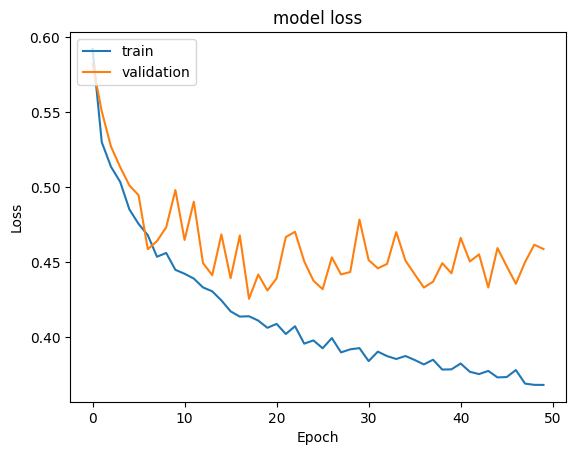

In [174]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

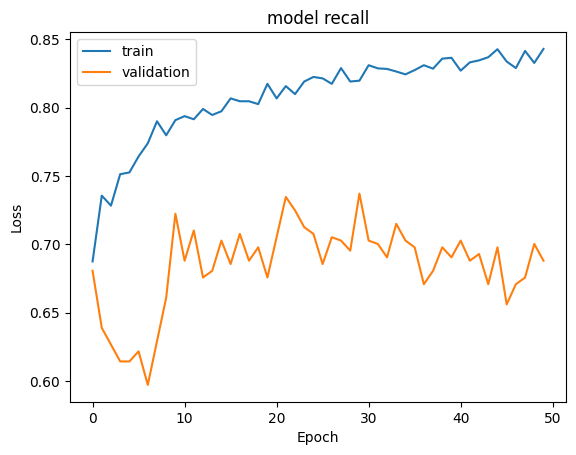

In [175]:
#Plotting Train recall vs Validation recall
plt.plot(history_5.history['recall'])
plt.plot(history_5.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [176]:
y_train_pred = model_5.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

299/299 [==============================] - 0s 700us/step


array([[False],
       [ True],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [177]:
y_val_pred = model_5.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 [==============================] - 0s 581us/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [178]:
model_name = "NN with SMOTE,Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [179]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      4777
           1       0.84      0.87      0.86      4777

    accuracy                           0.85      9554
   macro avg       0.85      0.85      0.85      9554
weighted avg       0.85      0.85      0.85      9554



In [180]:
#classification report
## check the model's performance on the validation set
cr=classification_report(y_val,y_val_pred)  
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.81      0.86      1593
           1       0.49      0.69      0.57       407

    accuracy                           0.79      2000
   macro avg       0.70      0.75      0.72      2000
weighted avg       0.82      0.79      0.80      2000



**Confusion matrix**

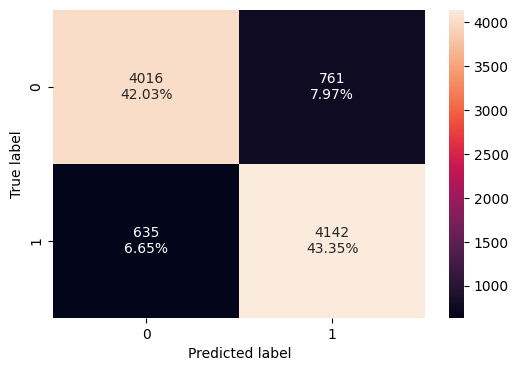

In [181]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

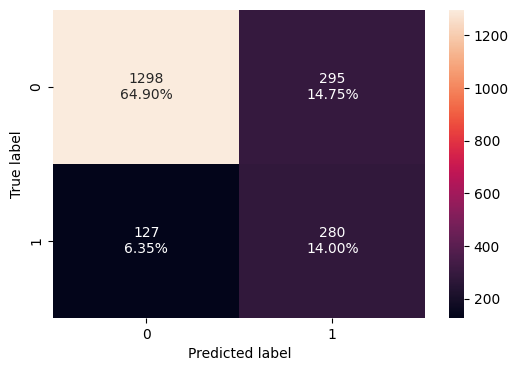

In [182]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)  ## check the model's performance on the validation set

## Model Performance Comparison and Final Model Selection

In [183]:
print("Training performance comparison")
train_metric_df

Training performance comparison


,recall
NN with SGD,1.000000
NN with Adam,0.476697
NN with Adam & Dropout,0.463614
NN with SMOTE & SGD,0.757798
NN with SMOTE & Adam,0.853883
"NN with SMOTE,Adam & Dropout",0.867071


In [184]:
print("Validation set performance comparison")
valid_metric_df

Validation set performance comparison


,recall
NN with SGD,1.000000
NN with Adam,0.425061
NN with Adam & Dropout,0.395577
NN with SMOTE & SGD,0.663391
NN with SMOTE & Adam,0.604423
"NN with SMOTE,Adam & Dropout",0.687961


In [185]:
train_metric_df - valid_metric_df

,recall
NN with SGD,0.000000
NN with Adam,0.051635
NN with Adam & Dropout,0.068037
NN with SMOTE & SGD,0.094407
NN with SMOTE & Adam,0.249461
"NN with SMOTE,Adam & Dropout",0.179111


In [186]:
y_test_pred = model_5.predict(X_test)    ## Complete the code to specify the best model
y_test_pred = (y_test_pred > 0.5)
print(y_test_pred)

63/63 [==============================] - 0s 1ms/step
[[False]
 [False]
 [False]
 ...
 [ True]
 [False]
 [False]]


In [187]:
#print classification report
cr=classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.80      0.85      1593
           1       0.47      0.71      0.57       407

    accuracy                           0.78      2000
   macro avg       0.69      0.76      0.71      2000
weighted avg       0.83      0.78      0.79      2000



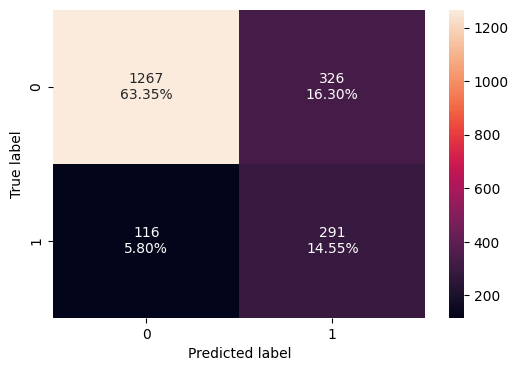

In [188]:
#Calculating the confusion matrix
make_confusion_matrix(y_test,y_test_pred)

## Actionable Insights and Business Recommendations

* We have trained 5 different models with some changes in architecture and Optimizer.
* NN with SMOTE, Adam and Dropout provided the maximum Recall, and was the best in Validation set.
___